### Scarping MoralStories.com

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas
import matplotlib.pyplot as plt
from collections import Counter

In [51]:
doc_url = "https://www.moralstories.org/page/"

urls = []
categories = []
tags = []


with requests.Session() as session:
    
    for pg in range(1, 23):
        #print("Getting Page " + pg)
    
        result = session.get(doc_url + str(pg), headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(result.text, 'lxml')
        main_divs = soup.find(class_="posts").find_all(class_="post-preview")

        for title in main_divs:
            urls.append(title.find('a')['href'])
            tags.append([class_.replace("tag-", "") for class_ in title['class'] if class_.startswith("tag-")])
            categories.append([class_.replace("category-", "") for class_ in title['class'] if class_.startswith("category-")])
            

In [52]:
titles = []
stories = []
morals = []

pandas.set_option("display.max_rows", None, "display.max_columns", None)


with requests.Session() as session:
    
    for url in urls:
        #print("Getting " + url)
        result = session.get(url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(result.text, 'lxml')
        titles.append(soup.find(class_="post-title").find("a").get_text())

        paras = soup.find(class_="post-content").find_all("p", recursive=False)
        stories.append(" ".join([para.get_text() for para in paras]))
        
        moral = soup.find(class_="post-content").find("blockquote")
        morals.append(moral.get_text() if moral != None else "")
        

        

                                                 url      category  \
0  https://www.moralstories.org/tenali-rama-and-t...   [education]   
1  https://www.moralstories.org/the-shepherd-boy-...      [fables]   
2     https://www.moralstories.org/a-kings-painting/  [motivation]   
3  https://www.moralstories.org/a-limit-of-your-k...        [life]   
4  https://www.moralstories.org/the-pig-and-the-s...      [fables]   

                         tag                          title  \
0        [fool, learn, work]     Tenali Rama and the Trader   
1                  [honesty]  The Shepherd Boy and the Wolf   
2  [clever, learn, weakness]              A King’s Painting   
3           [help, kindness]       A limit of your Kindness   
4              [kids, learn]          The Pig and The Sheep   

                                               story  \
0  King Krishnadevaraya loved horses and had a co...   
1  A Shepherd Boy tended his master’s Sheep near ...   
2  Once upon a time, there was a

In [58]:
        
data = pandas.DataFrame({
    "url": urls,
    "category": categories,
    "tag": tags,
    "title": titles,
    "story": stories,
    "moral": morals
})

print(data.head())

                                                 url      category  \
0  https://www.moralstories.org/tenali-rama-and-t...   [education]   
1  https://www.moralstories.org/the-shepherd-boy-...      [fables]   
2     https://www.moralstories.org/a-kings-painting/  [motivation]   
3  https://www.moralstories.org/a-limit-of-your-k...        [life]   
4  https://www.moralstories.org/the-pig-and-the-s...      [fables]   

                         tag                          title  \
0        [fool, learn, work]     Tenali Rama and the Trader   
1                  [honesty]  The Shepherd Boy and the Wolf   
2  [clever, learn, weakness]              A King’s Painting   
3           [help, kindness]       A limit of your Kindness   
4              [kids, learn]          The Pig and The Sheep   

                                               story  \
0  King Krishnadevaraya loved horses and had a co...   
1  A Shepherd Boy tended his master’s Sheep near ...   
2  Once upon a time, there was a

In [53]:
categories_ = [item for sublist in categories for item in sublist]
tags_ = [item for sublist in tags for item in sublist]

sorted_categories = sorted(set(categories_))
sorted_tags = sorted(set(tags_))

print(sorted_categories)
print(sorted_tags)

['education', 'fables', 'family', 'inspiration', 'life', 'love', 'motivation']
['akbar-birbal', 'care', 'cheating', 'clever', 'deeds', 'dream', 'fear', 'fool', 'friends', 'funny', 'greed', 'happiness', 'help', 'honesty', 'impression', 'incomplete-love', 'india', 'kids', 'kind', 'kindness', 'lazy', 'learn', 'love', 'loyal', 'marriage', 'mother', 'mythology', 'panchatantra', 'parents', 'patience', 'poor', 'regret', 'respect', 'responsibility', 'self-confidence', 'selfish', 'share', 'study', 'temper', 'unconditional-love', 'unity', 'video', 'weakness', 'work']


#### Annotated
 
'education', 'family', 'inspiration', 'life', 'love', 'motivation'


'care', 'cheating', 'clever', 
'deeds', 'dream', 
'fear', 'fool', 'friends', 'funny', 
'greed', 
'happiness', 'help', 'honesty', 
'impression', 'incomplete-love', 
'kids', 'kind', 'kindness', 
'lazy', 'learn', 'love', 'loyal', 
'marriage', 'mother', 
'parents', 'patience', 'poor', 
'regret', 'respect', 'responsibility', 
'self-confidence', 'selfish', 'share', 'study', 
'temper', 
'unconditional-love', 
'unity', 
'weakness', 'work'


envy
pride
dishonest

#### Stats

Number of Stories: 131
Number of Categories: 7
Number of Tags: 44
Total Words: 44661

Counts of Categories:
Counter({'life': 34, 'fables': 25, 'education': 24, 'family': 20, 'motivation': 17, 'inspiration': 17, 'love': 14})


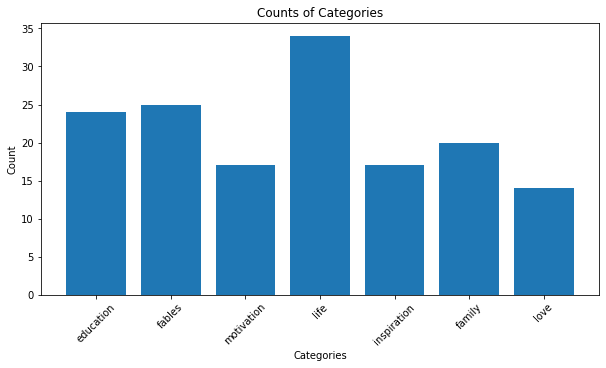

Counts of Tags:
Counter({'kids': 35, 'clever': 16, 'responsibility': 16, 'learn': 15, 'parents': 14, 'work': 12, 'care': 11, 'love': 11, 'respect': 10, 'self-confidence': 9, 'akbar-birbal': 9, 'unconditional-love': 9, 'help': 8, 'incomplete-love': 8, 'india': 8, 'honesty': 7, 'kindness': 7, 'greed': 7, 'happiness': 6, 'unity': 6, 'fool': 5, 'weakness': 5, 'deeds': 4, 'funny': 4, 'poor': 4, 'mother': 4, 'friends': 4, 'regret': 3, 'selfish': 2, 'loyal': 2, 'impression': 2, 'cheating': 2, 'panchatantra': 2, 'mythology': 2, 'patience': 2, 'marriage': 1, 'share': 1, 'study': 1, 'kind': 1, 'dream': 1, 'lazy': 1, 'temper': 1, 'video': 1, 'fear': 1})


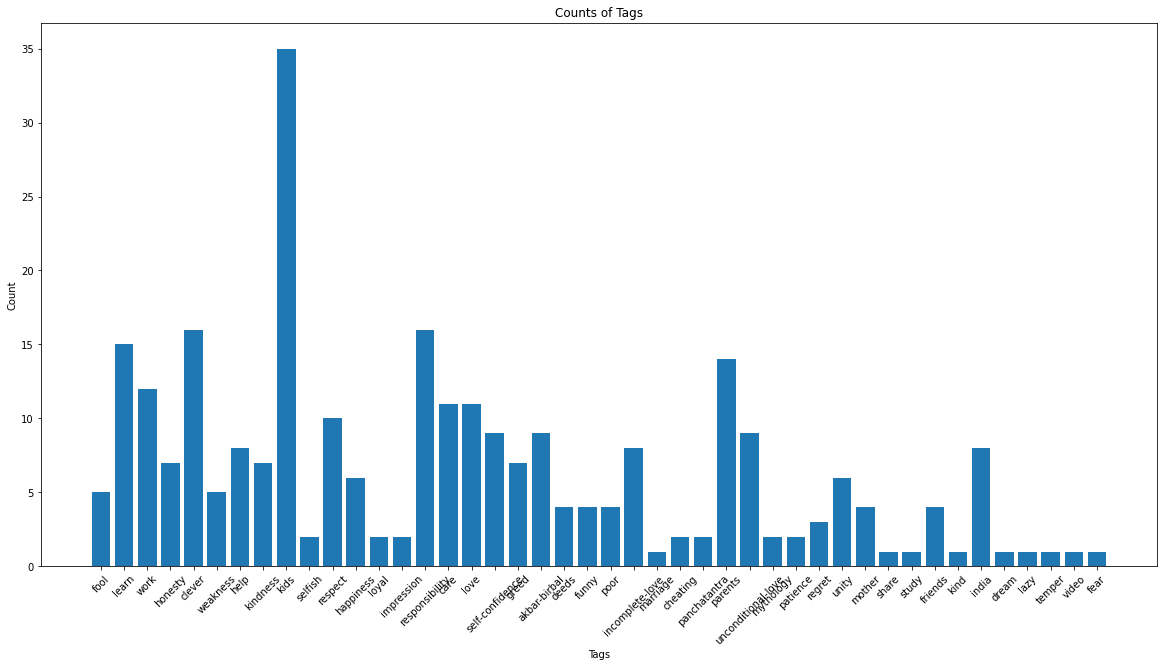

Words Distribution per Story:
                 0
count   131.000000
mean    340.923664
std     261.096965
min      77.000000
25%     181.000000
50%     276.000000
75%     402.500000
max    1878.000000


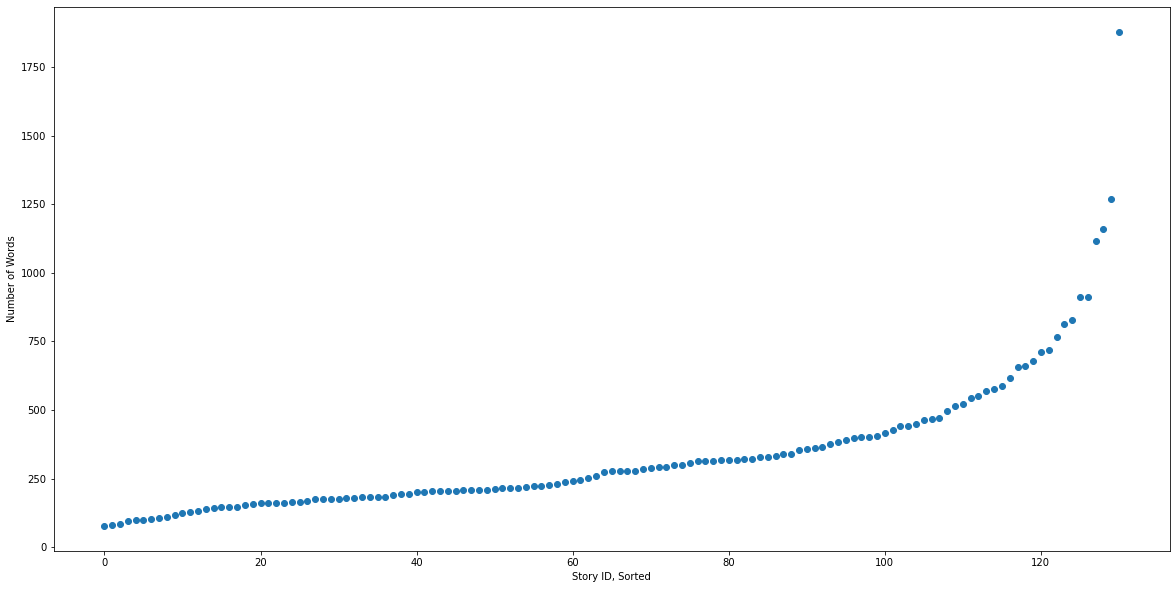

Sentence Distribution per Story:
                0
count  131.000000
mean    23.038168
std     18.774535
min      6.000000
25%     12.000000
50%     18.000000
75%     27.000000
max    151.000000


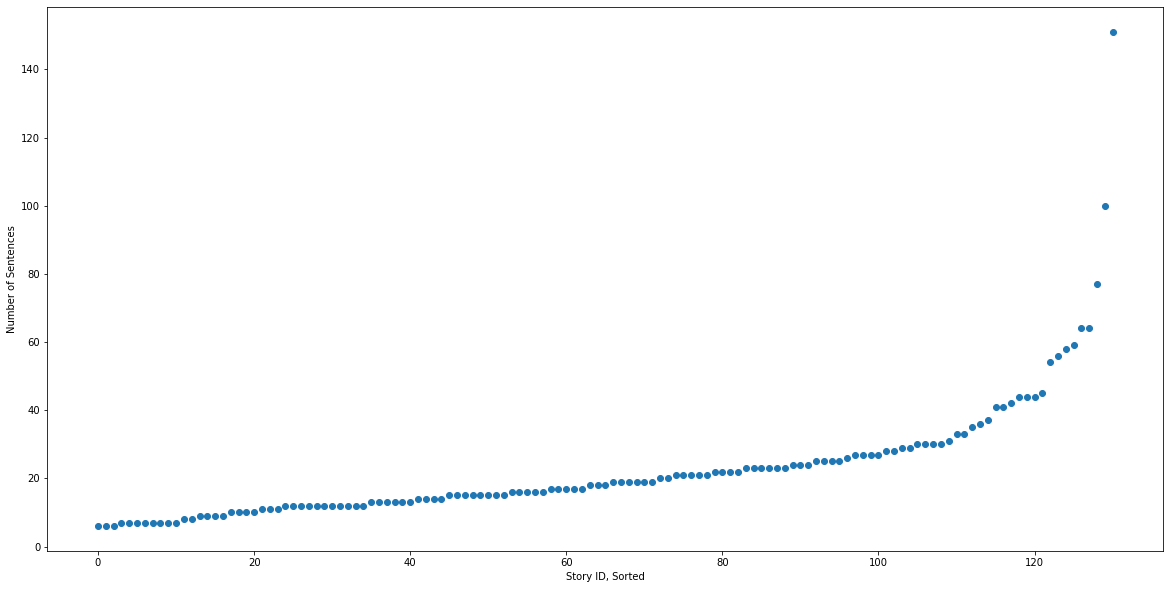

In [5]:
length = [len(story.split(" ")) for story in stories]
length_sen = [len(story.split(".")) for story in stories]

print("Number of Stories:" , len(stories))
print("Number of Categories:" , len(sorted_categories))
print("Number of Tags:" , len(sorted_tags))
print("Total Words:", sum(length))
count = Counter(categories_)
count2 = Counter(tags_)

print("\nCounts of Categories:")
print(count)

plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(list(count.keys()), list(count.values()))
plt.title("Counts of Categories")
plt.ylabel("Count")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.show()

print("Counts of Tags:")
print(count2)

plt.rcParams['figure.figsize'] = [20, 10]
plt.bar(list(count2.keys()), list(count2.values()))
plt.title("Counts of Tags")
plt.ylabel("Count")
plt.xlabel("Tags")
plt.xticks(rotation=45)
plt.show()




print("Words Distribution per Story:")
print(pandas.DataFrame(length).describe())
plt.scatter(range(0, len(length)),sorted(length))
plt.ylabel("Number of Words")
plt.xlabel("Story ID, Sorted")
plt.show()

print("Sentence Distribution per Story:")
print(pandas.DataFrame(length_sen).describe())
plt.scatter(range(0, len(length_sen)),sorted(length_sen))
plt.ylabel("Number of Sentences")
plt.xlabel("Story ID, Sorted")
plt.show()



In [64]:
data.to_csv('moral_stories_org_scraped.csv', encoding='utf-8')

In [65]:

sentence_embeddings = model.encode("Moral: Do not believe in strangers blindly. The same goes when you do your business with anyone.")
sentence_embeddings2 = model.encode("Moral: Do not believe in stranger")
print(len(sentence_embeddings))
print(len(sentence_embeddings2))

384
384


In [69]:
data = data.explode('tag')

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

with open('outputMoralStories3.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    a = list(range(0,384))
    #a.append("moral")
    a.append("class")
    tsv_output.writerow(a)
    
    for index, row in data.iterrows():
        print(index)
        b = model.encode(row['moral'].replace("Moral:", "")).tolist()
        #b.append(row['moral'].replace("Moral:", "").replace(" ", "_"))
        b.append(row['tag'])
        tsv_output.writerow(b)

0
0
0
1
2
2
2
3
3
4
4
5
5
6
6
7
8
9
9
10
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
18
18
19
19
19
20
21
21
21
22
22
22
23
23
24
24
24
25
25
26
26
26
27
27
27
28
28
29
29
30
30
31
31
32
32
33
34
34
34
35
36
36
37
37
37
38
38
38
39
39
39
40
40
41
42
42
43
44
45
45
45
46
46
46
46
47
47
47
48
48
48
49
49
50
50
50
51
51
52
52
52
52
53
53
54
54
54
55
55
55
56
56
57
57
58
58
59
59
60
60
60
61
61
61
61
62
62
62
62
63
63
63
64
64
65
65
65
66
66
67
67
67
68
68
69
69
69
70
70
71
71
71
71
72
72
73
73
73
74
74
75
75
76
76
77
77
78
78
78
79
79
79
79
80
80
81
82
83
84
84
84
85
85
85
86
86
86
87
87
87
88
89
89
90
91
91
92
92
93
93
94
95
95
96
96
96
97
97
98
98
99
99
99
100
100
101
101
102
103
104
104
105
105
106
106
107
108
109
110
110
110
110
111
112
112
113
113
113
114
115
116
116
116
117
118
119
120
120
121
121
122
122
123
124
124
125
125
125
125
126
127
127
128
129
130


### Scraping AesopMorals.com

In [2]:
doc_url = "https://www.litscape.com/indexes/Aesop/Titles.html"

urls = []
categories = []
tags = []
titles = []
stories = []
morals = []


with requests.Session() as session:
    
    result = session.get(doc_url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(result.text, 'lxml')
    main_divs = soup.find(class_="multicolumn width300").find_all("a")

    for title in main_divs:
        url = "https://www.litscape.com" + title["href"]
        urls.append(url)
        
        #print(url)

        result = session.get(url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(result.text, 'lxml')
        
        titles.append(soup.find(class_="content").find("h1").get_text())
        
        stories.append(" ".join([stry.get_text() for stry in soup.find(class_="content").find_all("p", class_=None)[1:]]))
        
        moral = soup.find(class_="content").find("p", class_="moral")
        morals.append(moral.get_text() if moral != None else "")
        
data2 = pandas.DataFrame({
    "url": urls,
    "title": titles,
    "story": stories,
    "moral": morals
})
    
        
print(data2.head())            

                                                 url  \
0  https://www.litscape.com/author/Aesop/Jupiter_...   
1  https://www.litscape.com/author/Aesop/The_Ants...   
2  https://www.litscape.com/author/Aesop/The_Ass_...   
3  https://www.litscape.com/author/Aesop/The_Ass_...   
4  https://www.litscape.com/author/Aesop/The_Ass_...   

                          title  \
0        Jupiter and the Monkey   
1  The Ants and the Grasshopper   
2        The Ass and His Driver   
3     The Ass and His Purchaser   
4        The Ass and His Shadow   

                                               story  \
0  JUPITER ISSUED a proclamation to all the beast...   
1  THE ANTS were employing a fine winter's day in...   
2  AN ASS, being driven along a high road, sudden...   
3  A MAN wished to purchase an Ass, and agreed wi...   
4  A TRAVELER hired an Ass to convey him to a dis...   

                                               moral  
0  Moral:A mother's love blinds her to many imper...  
1    

Number of Stories: 237
Total Words: 24728
Words Distribution per Story:
                0
count  237.000000
mean   104.337553
std     46.539440
min     37.000000
25%     71.000000
50%     96.000000
75%    127.000000
max    354.000000


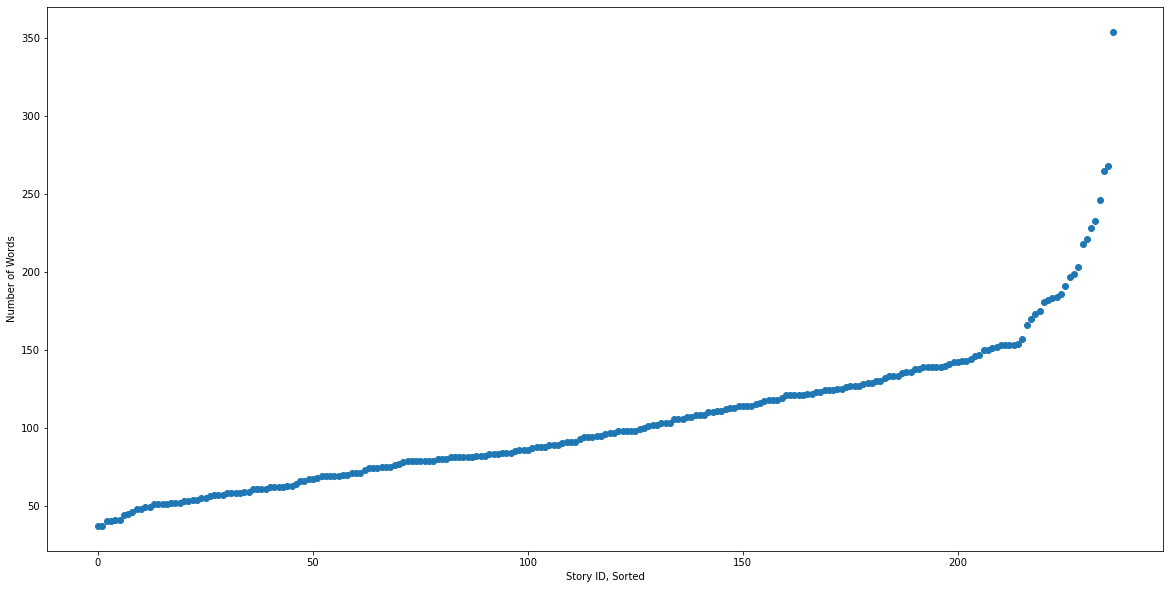

Sentence Distribution per Story:
                0
count  237.000000
mean     5.177215
std      2.103827
min      2.000000
25%      4.000000
50%      5.000000
75%      6.000000
max     17.000000


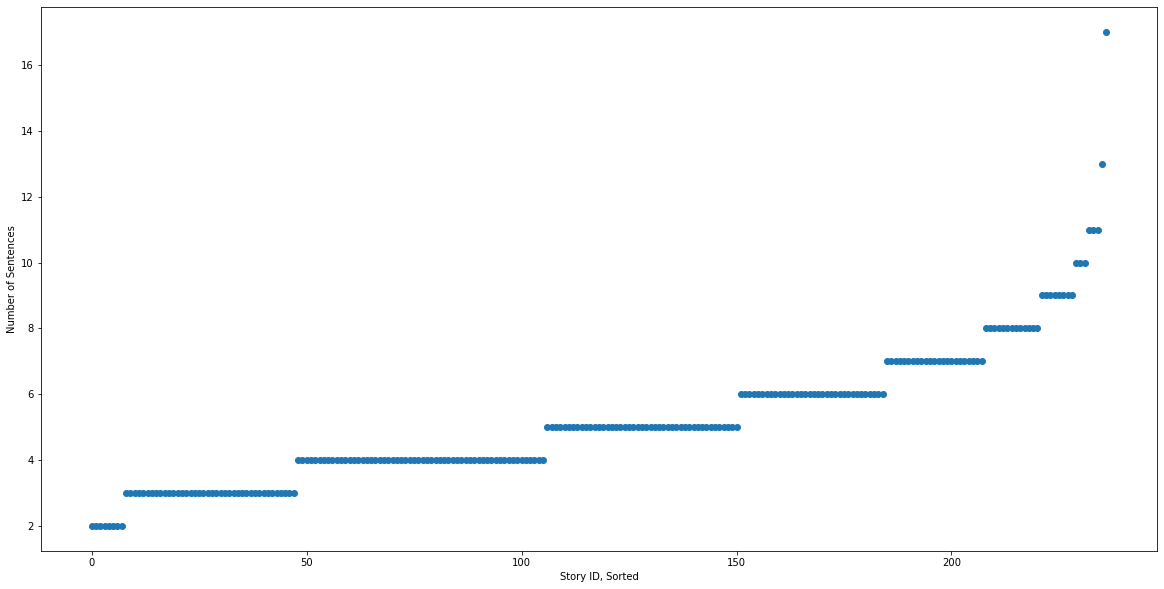

In [7]:
length = [len(story.split(" ")) for story in stories]
length_sen = [len(story.split(".")) for story in stories]

print("Number of Stories:" , len(stories))
print("Total Words:", sum(length))


plt.rcParams['figure.figsize'] = [20, 10]



print("Words Distribution per Story:")
print(pandas.DataFrame(length).describe())
plt.scatter(range(0, len(length)),sorted(length))
plt.ylabel("Number of Words")
plt.xlabel("Story ID, Sorted")
plt.show()

print("Sentence Distribution per Story:")
print(pandas.DataFrame(length_sen).describe())
plt.scatter(range(0, len(length_sen)),sorted(length_sen))
plt.ylabel("Number of Sentences")
plt.xlabel("Story ID, Sorted")
plt.show()

In [87]:
data2.to_csv('aesop_morals_com_scraped.csv', encoding='utf-8')